# Obesity Level Classification Using Physical Condition and Lifestyle Habit Predictors

## Introduction

Obesity is defined as a disease involving excessive body fat and can significantly impact the health of an individual. In comparison to people with normal weight, those with obesity are associated with a higher risk of negative health conditions such as Type 2 diabetes, heart disease and cancer (Nguyen, 2010). Dietary changes, lifestyle habits, and treatment can positively influence the obesity level of an individual (Trivedi, 2014). In our data analysis, we would like to classify the obesity level category for an individual using physical condition and lifestyle habits, in order for them to gain knowledge of their current health and to help inform future lifestyle choices.

Question: What is the obesity level category (underweight, normal, Overweight I, Overweight II, Obesity I, Obesity II, Obesity III) of a new observation predicted by physical condition and eating habits?

The dataset used includes data on the estimated obesity levels of individuals from Mexico, Peru and Columbia using eating habits and physical conditions. The dataset classifies an individual into one of the seven obesity level classes (outlined above) and contains 17 attributes with 2111 records. Some of the data was directly collected from web users, while others were synthetically generated.


## Preliminary exploratory data analysis

In [8]:
# Setup
# Run this before continuing
library(tidyverse)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### The Obesity Data Set

In [14]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip",temp)
obesity <- read.csv(unz(temp, "ObesityDataSet_raw_and_data_sinthetic.csv"))
unlink(temp)

In [15]:
obesity <- obesity %>%
            mutate(NObeyesdad = as_factor(NObeyesdad), CH2O = CH2O - 1)
obesity

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>
Female,21,1.62,64,yes,no,2,3,Sometimes,no,1,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56,yes,no,3,3,Sometimes,yes,2,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.80,77,yes,no,2,3,Sometimes,no,1,no,2,1,Frequently,Public_Transportation,Normal_Weight
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Female,22.52404,1.752206,133.6894,yes,yes,3,3,Sometimes,no,1.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
Female,24.36194,1.739450,133.3466,yes,yes,3,3,Sometimes,no,1.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
Female,23.66471,1.738836,133.4726,yes,yes,3,3,Sometimes,no,1.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Data summary

In [3]:
# Weight, FAF, CH2O, TUE
obesity_num <- obesity %>%
    select(Weight, FAF, CH2O, TUE) %>%
    pivot_longer(cols = Weight:TUE,
                names_to = "Variable",
                values_to = "Stat") %>%
    group_by(Variable) %>%
    summarize(Minimum = min(Stat), Maximum = max(Stat), Mean = mean(Stat), Median = median(Stat), Mode = names(table(Stat))[table(Stat)==max(table(Stat))], 
                  Standard_deviation = sd(Stat))

`summarise()` ungrouping output (override with `.groups` argument)



### Summary table for Weight, Physical activity frequency (FAF), Time using technology devices (TUE), and daily water intake (CH2O)

In [4]:
obesity_num

Variable,Minimum,Maximum,Mean,Median,Mode,Standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CH2O,0,2,1.0080114,1.00000,1,0.6129535
FAF,0,3,1.0102977,1.00000,0,0.8505924
TUE,0,2,0.6578659,0.62535,0,0.6089273
Weight,39,173,86.5860581,83.00000,80,26.1911717


## Data Visualization

In [5]:
options(repr.plot.width = 12, repr.plot.height = 10)

# Scatter plot
weight_faf_plot <- obesity %>%
                ggplot(aes(x = Weight, y = FAF, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Weight (kg)", y = "Physical activity", color = "Obesity Level") +
                    theme(text = element_text(size = 20))

weight_ch2o_plot <- obesity %>%
                ggplot(aes(x = Weight, y = CH2O, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Weight (kg)", y = "Consumption of water daily (liters)", color = "Obesity Level") +
                    theme(text = element_text(size = 20))

weight_tue_plot <- obesity %>%
                ggplot(aes(x = Weight, y = TUE, color = NObeyesdad)) +
                    geom_point() +
                    labs(x = "Weight (kg)", y = "Time using technology devices", color = "Obesity Level") +
                    theme(text = element_text(size = 20))

# Density plot
FAF_plot <- ggplot(obesity, aes(x = FAF, colour = NObeyesdad)) +
    geom_density() +
    labs(x = "Physical activity frequency", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

CH2O_plot <- ggplot(obesity, aes(x = CH2O, colour = NObeyesdad)) +
  geom_density() +
    labs(x = "Water consumption (liters)", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

TUE_plot <- ggplot(obesity, aes(x = TUE, colour = NObeyesdad)) +
  geom_density() +
    labs(x = "Time using technology devices", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

weight_plot <- ggplot(obesity, aes(x = Weight, colour = NObeyesdad))+
  geom_density() +
    labs(x = "Weight (kg)", y = "Density", colour = "Obesity Level") +
    theme(text = element_text(size = 20))

Physical activity frequency:
- 0: I do not have
- 1: 1 or 2 days
- 2: 2 or 4 days
- 3: 4 or 5 days

Time using technology devices:
- 0: 0–2 hours
- 1: 3–5 hours
- 2: More than 5 hours

### Scatter plot visualizing the spread of Obesity Level using the relationship between Weight and other predictors

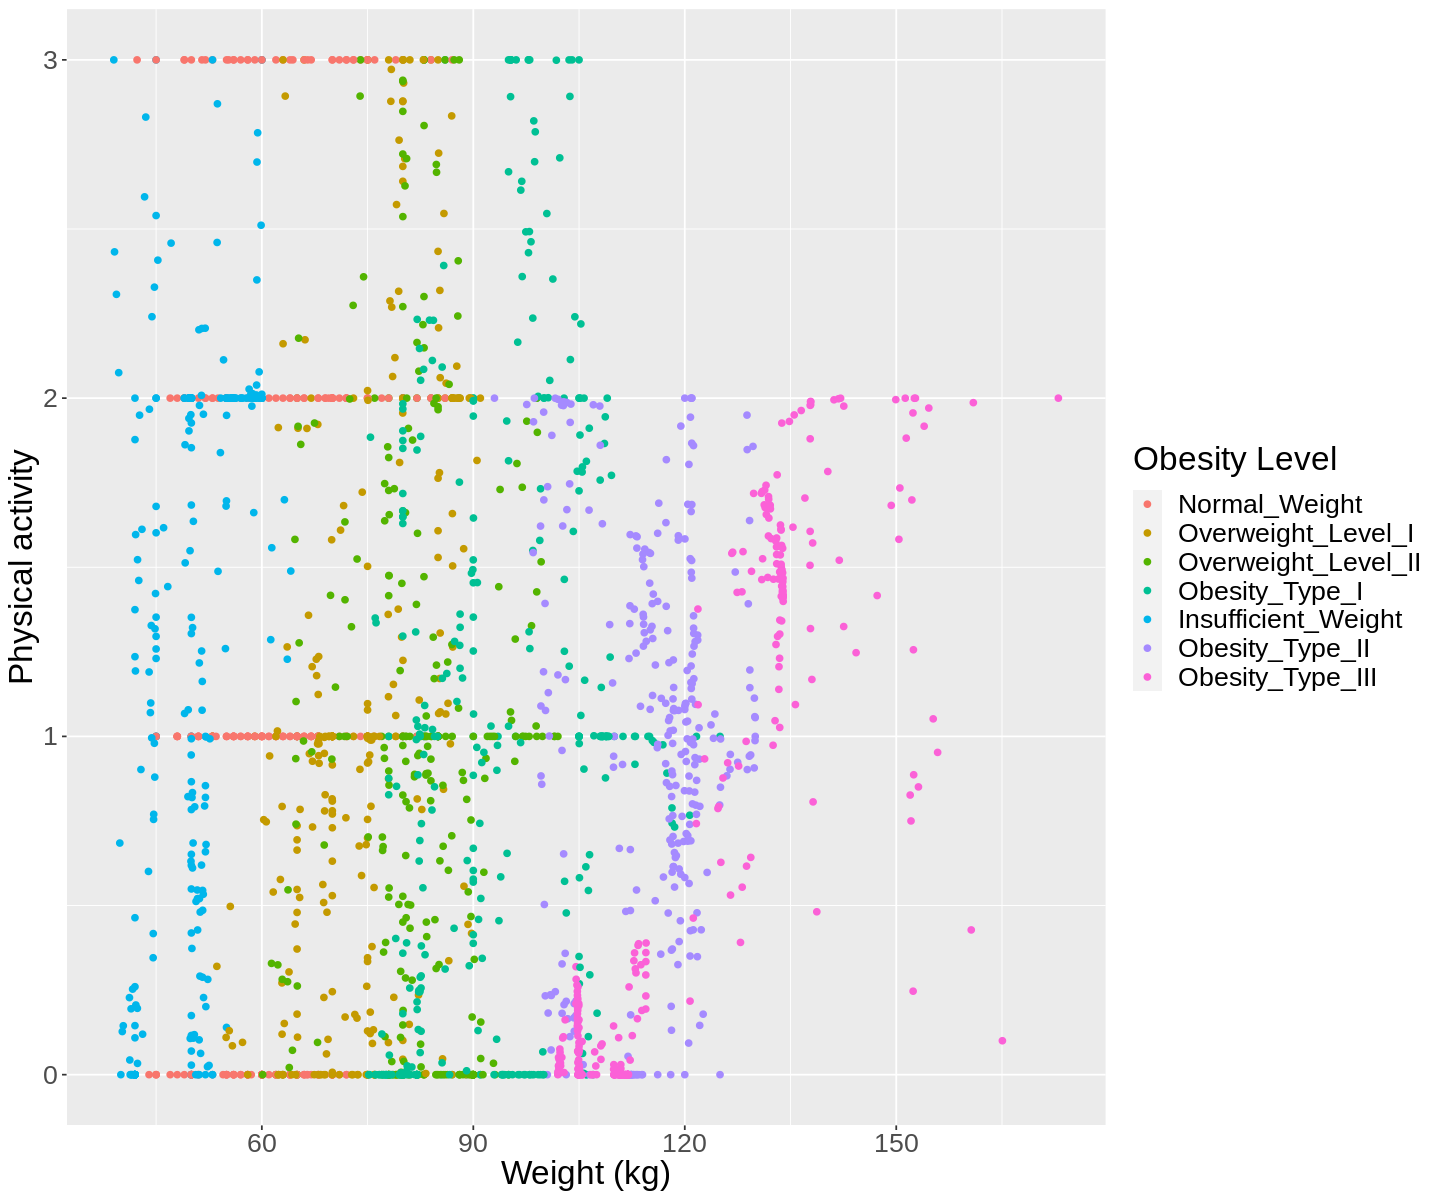

In [6]:
weight_faf_plot

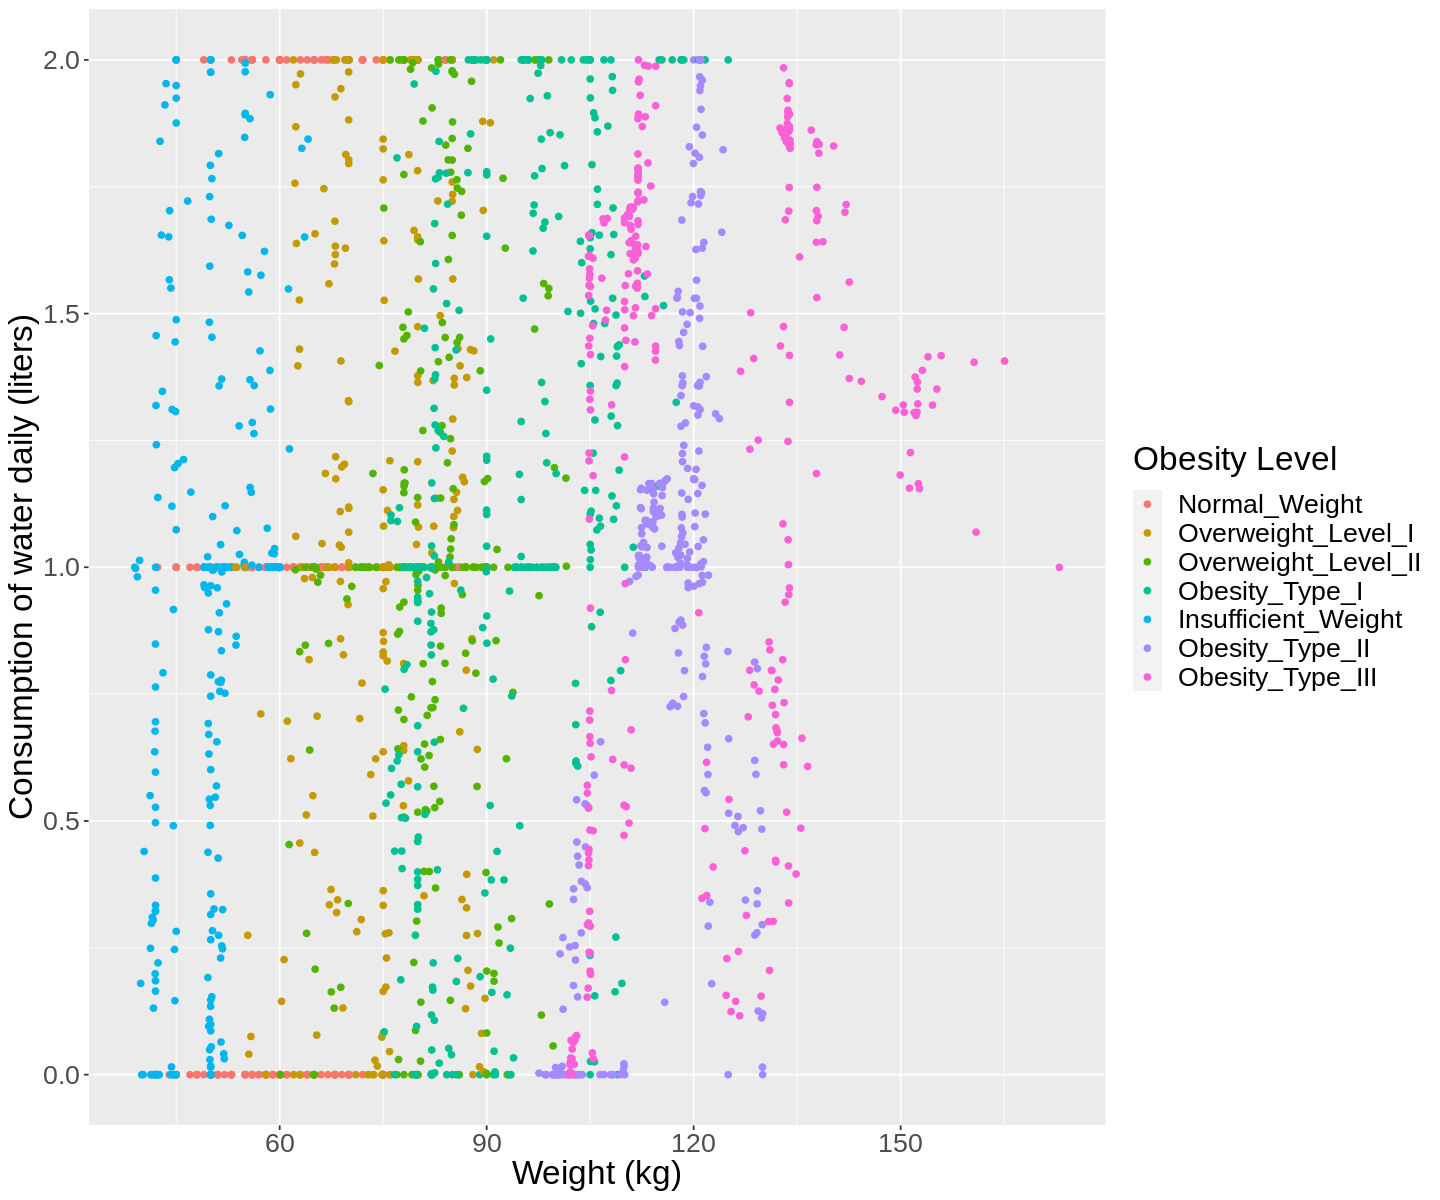

In [7]:
weight_ch2o_plot

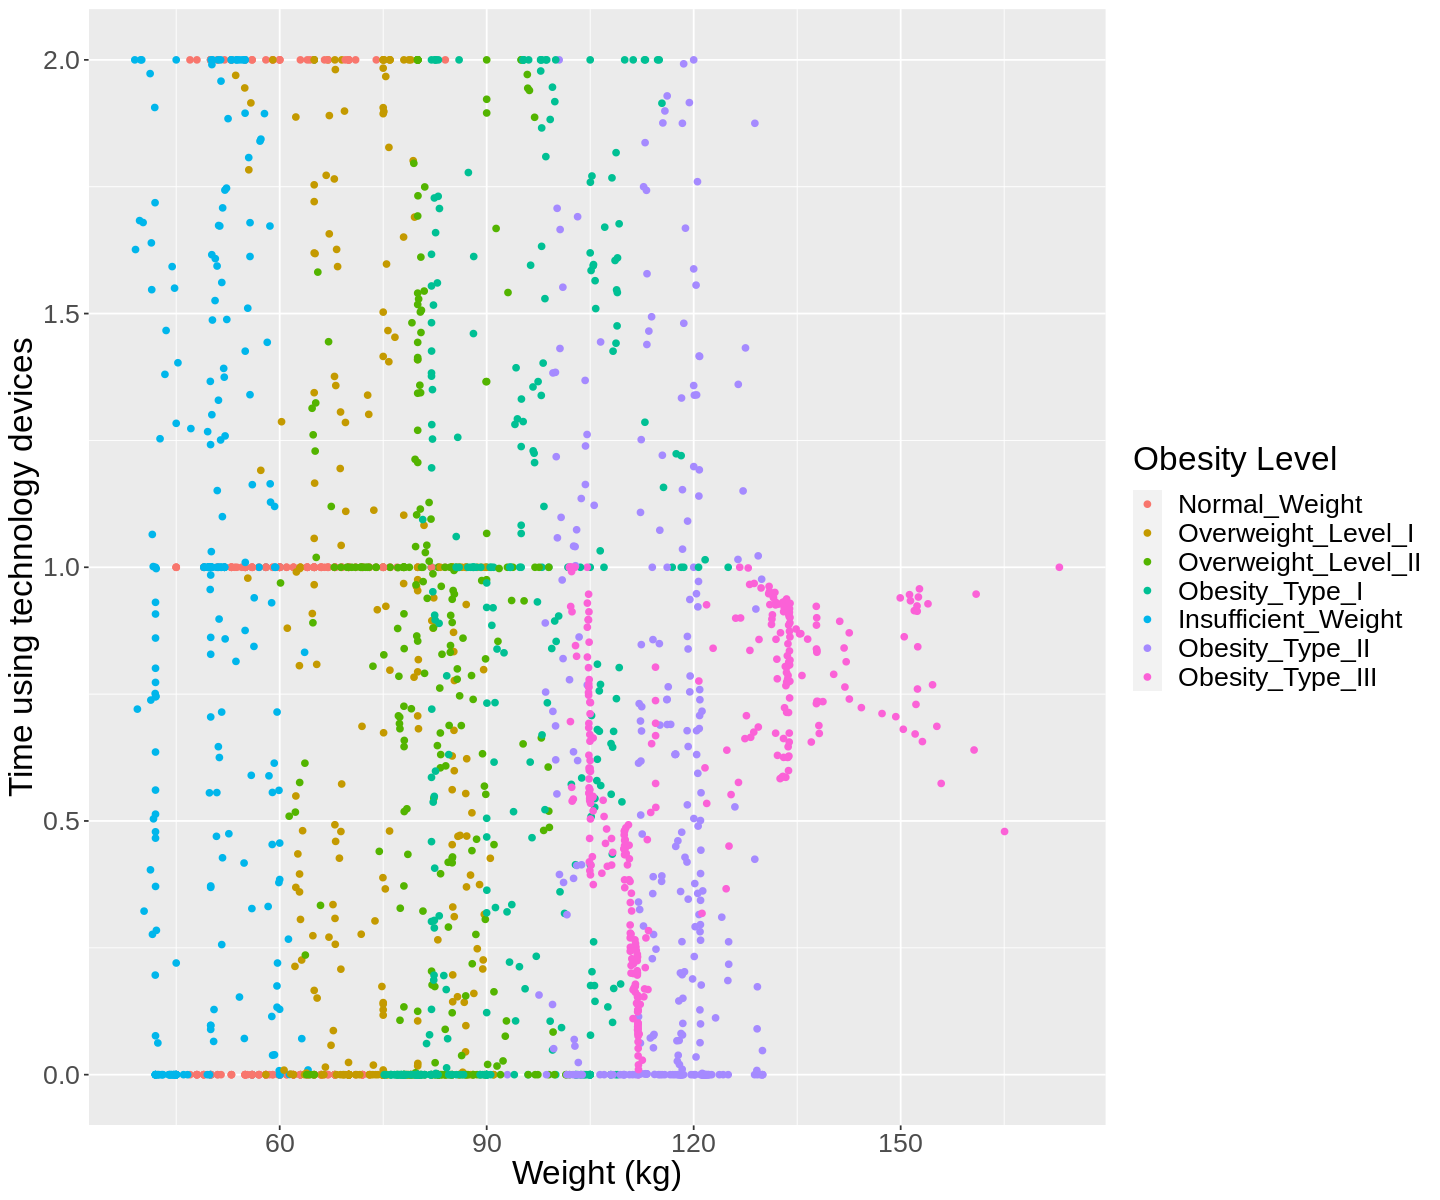

In [8]:
weight_tue_plot

### Density Plot

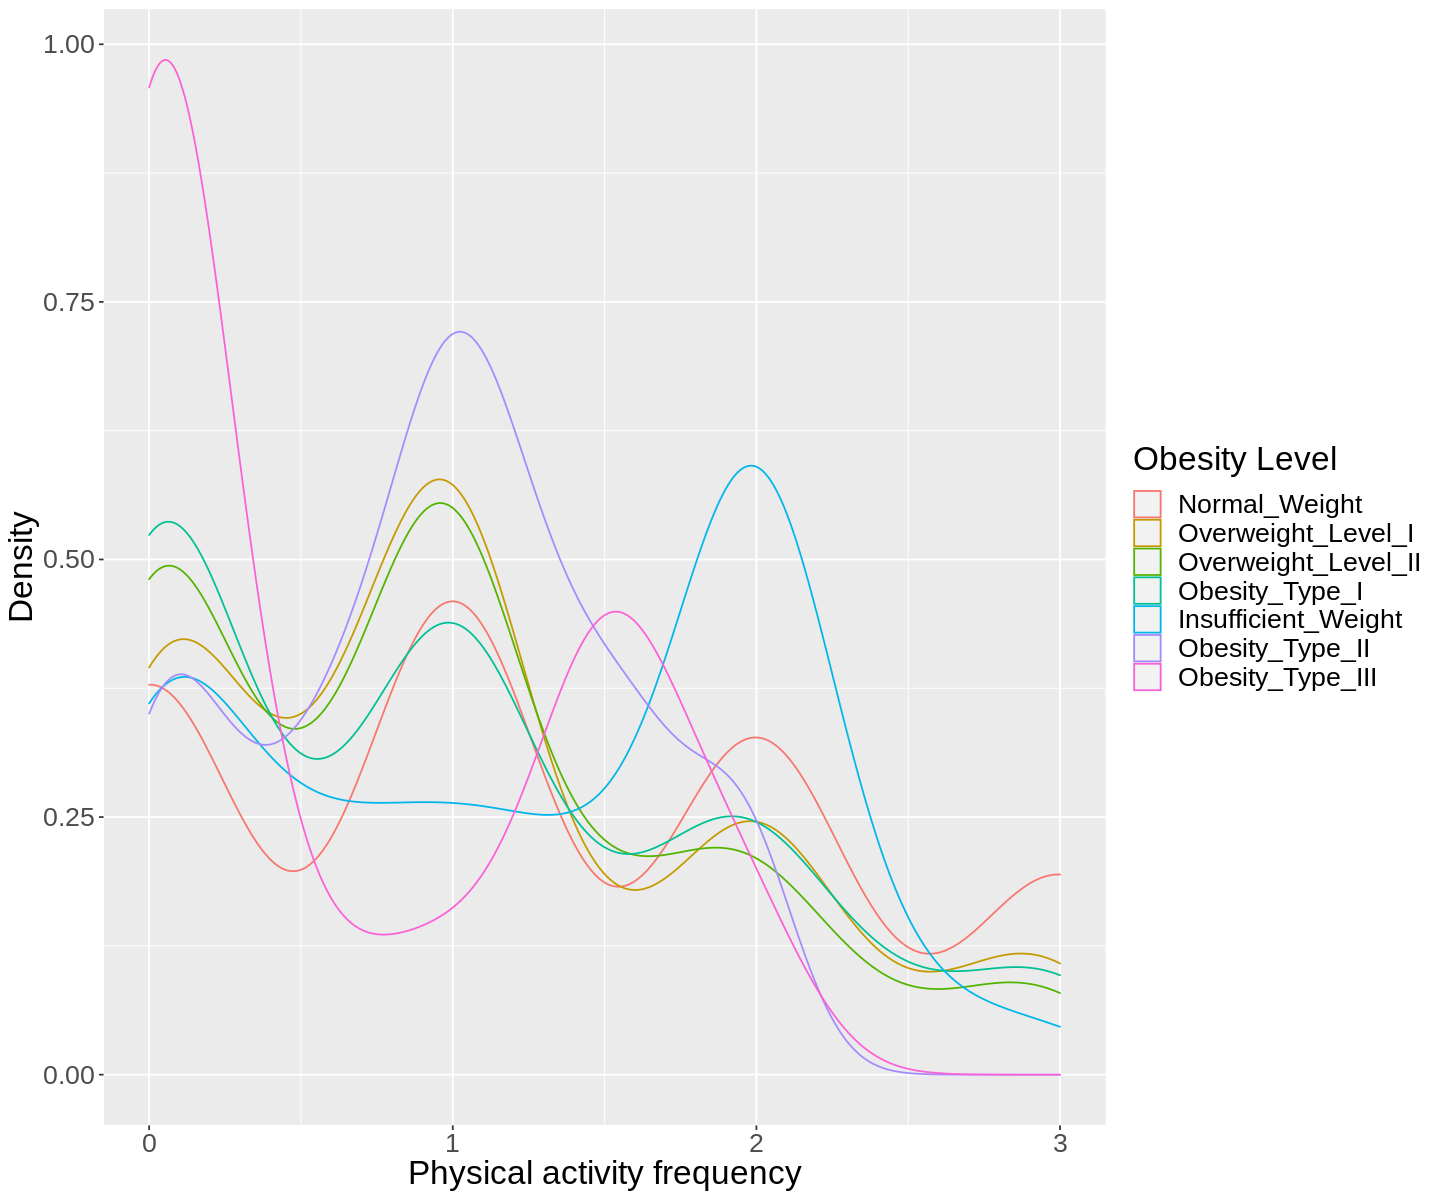

In [9]:
FAF_plot

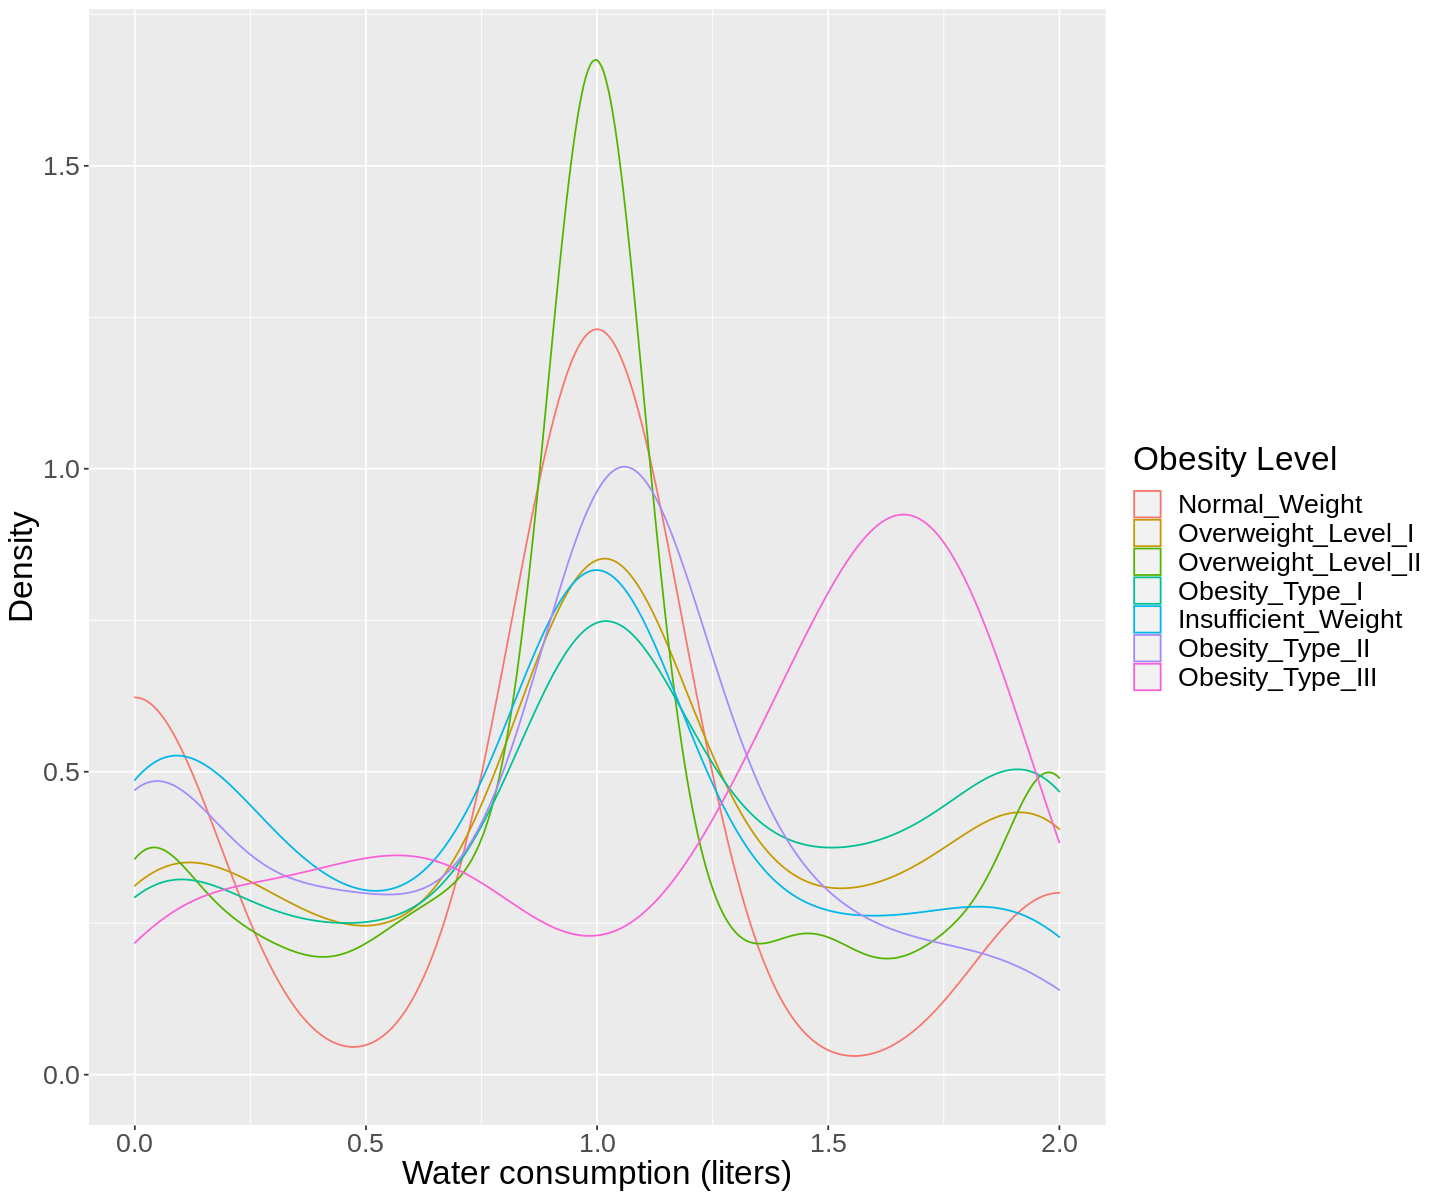

In [10]:
CH2O_plot

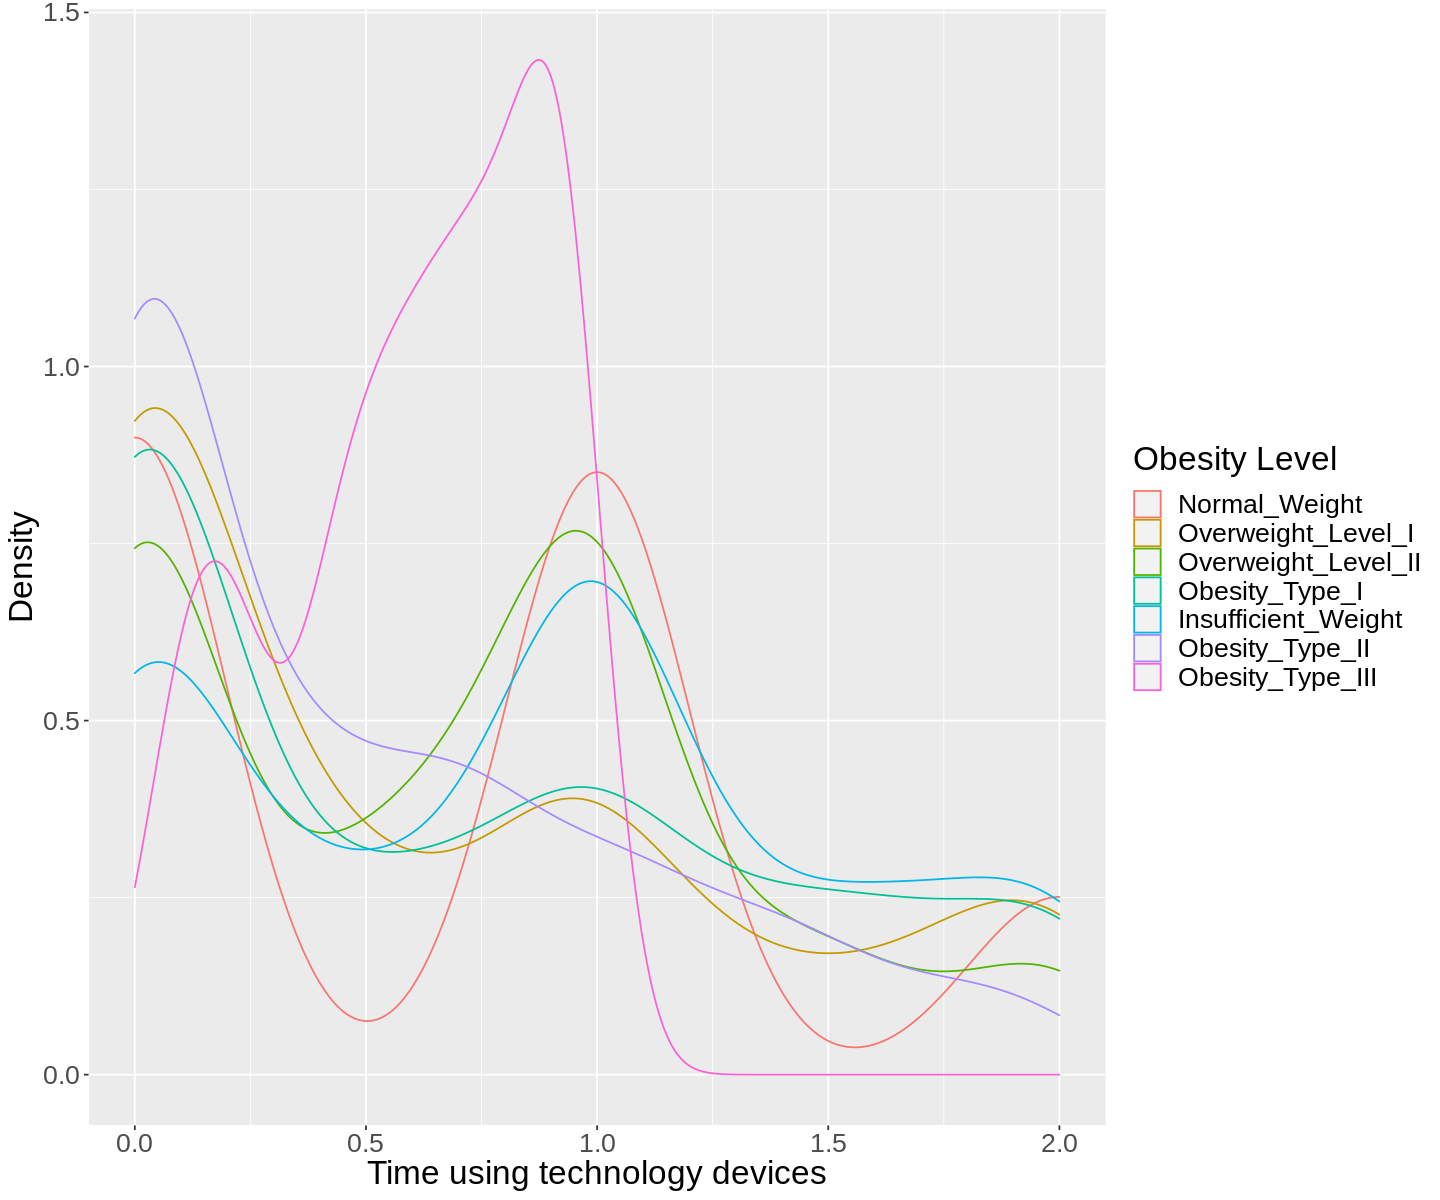

In [11]:
TUE_plot

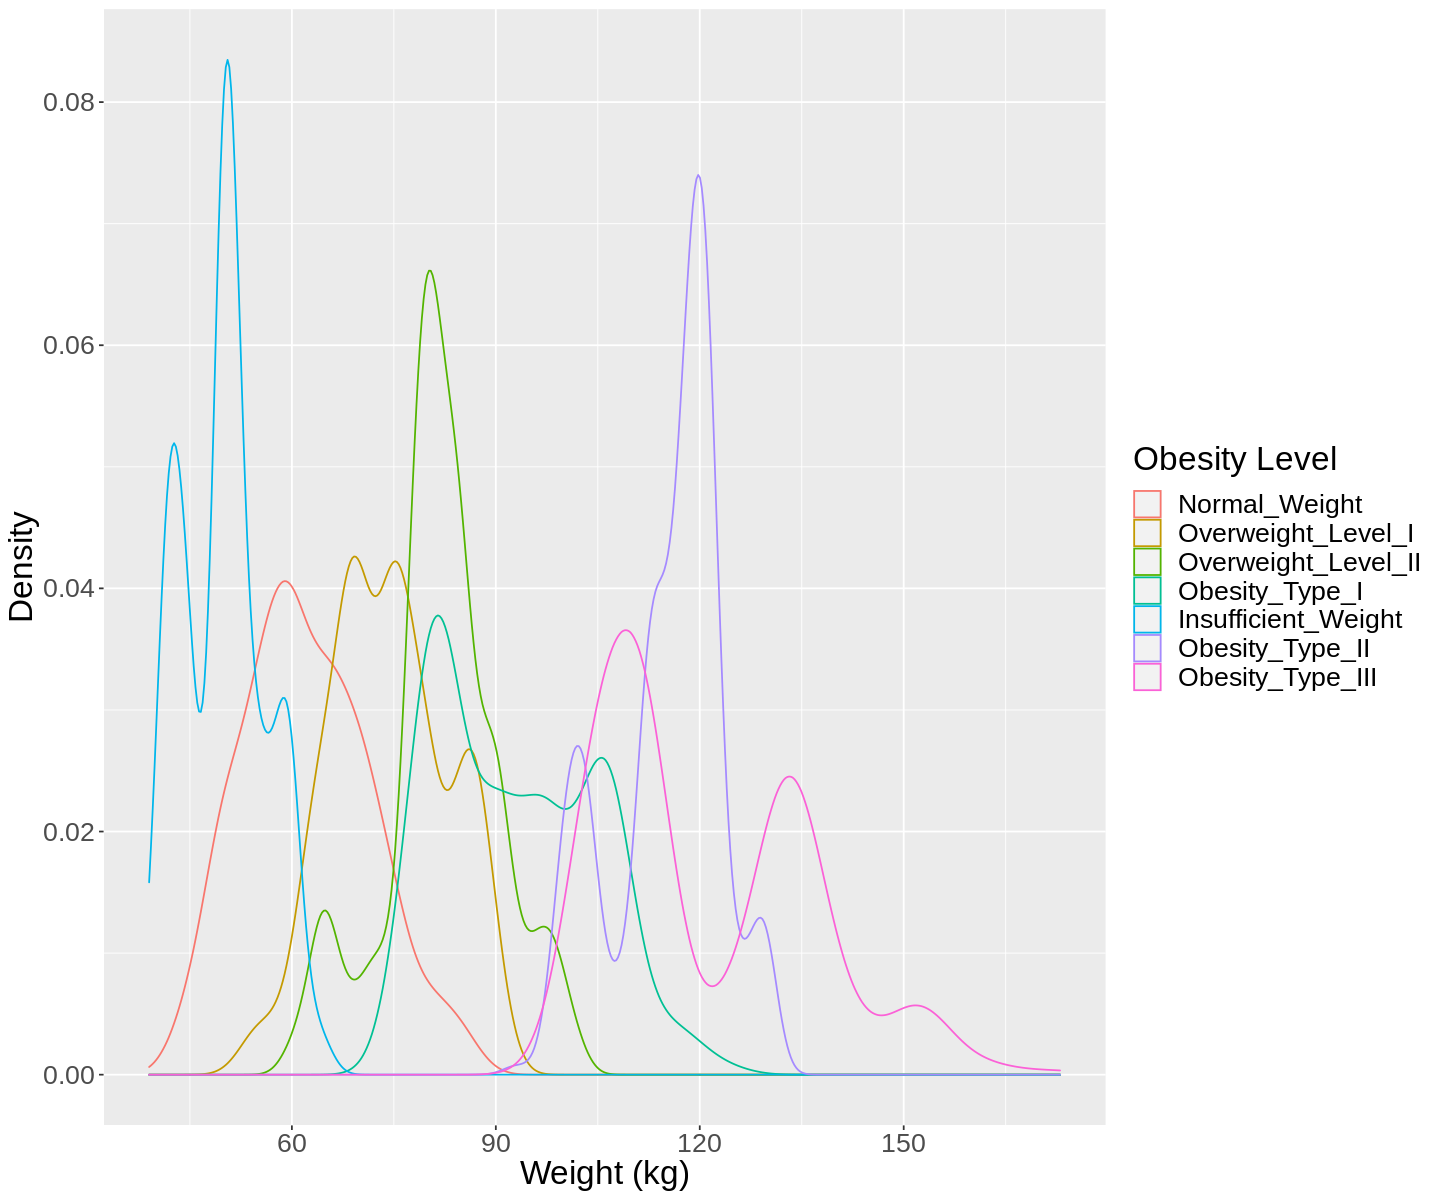

In [12]:
weight_plot

## Methods
We will conduct our data analysis by using classification using the K-nearest neighbors method. This method predicts a new observation’s label via finding the distances between the new observation to their K-nearest neighbors in order to classify the new observation. We will choose the K value for this analysis and classify our new observation into an obesity level category.

Variables/Columns that we will use:
- Target variable: Obesity Level
- Predictor variables: Physical activity frequency, Daily water intake, Weight and Technology Usage

One way that we will visualize the results is to create a scatter plot to visualize existing data and to show the nearest neighbors of the new observation.

## Expected outcomes and significance
Outcomes:
- We expect to be able to classify the new observation into one of the obesity level categorizations using our predictors. We expect to find observations that perform less physical activity, have less water intake, use technology frequently and are of higher weight to be classified in a higher obesity level.

Impacts:
- Classifying a new observation into an obese level category could help the individual know their level of obesity and its relationship with their lifestyle. By knowing which habits are negatively affecting their health, individuals may then make various changes in their current lifestyle in order to live a healthier life.

Future Questions:
- Possible diseases in relation to different stages of obesity.
- What is the relation between obesity and heart diseases?
- Categorizing the new observations with other predictors eg. family history.

### References:
Nguyen, D. M., & El-Serag, H. B. (03/2010). The epidemiology of obesity WB Saunders Company. doi:10.1016/j.gtc.2009.12.014

Trivedi, S., Burton, A., & Oden, J. (02/2014). Management of pediatric obesity: A lifestyle modification approach [s.n. doi:10.1007/s12098-013-1138-0

### Dataset: 
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+# 
